# Analyze hmov model parameters against unit info

## TODO

## Setup

### Start DJD
Run main.py as interactive (-i) module (-m) ( optionally and remotely (-r))\
NOTE: any code inside the DJD-executing cell other than the executing line is not allowed

In [1]:
run -im djd.main -- --dbname=dj_hmov --user=write

Connecting write@huxley.neuro.bzm:3306
Connected to database 'dj_hmov' as 'write@10.153.173.165'


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

from djd import hmov_models
from djd import hmov_unit
from l6s import l6s_utils # Layer 6 suppression code repo with utility functions for plotting unit overview 

Importing l6s package.


In [3]:
%load_ext autoreload
%autoreload 2

## Check hmov unit model scores against each other

In [4]:
hmov_df = pd.DataFrame((SplineLNP.Eval() * HmovUnit()).fetch(as_dict=True))
hmov_df

m  s  e   u  spl_paramset  spl_r_train  spl_r_test_mean                                 spl_r_test_repeats    spl_fev  spl_rf_qi  ...  hmu_fr_var_spont_ctrl  \
0    Ntsr1Cre_2019_0007  6  9   1             7     0.092489         0.020900  [0.046556965825569126, -0.04956196912962698, 0...  -0.051500   0.332883  ...               2.046590   
1    Ntsr1Cre_2019_0007  6  9   1             8     0.384698         0.337829  [0.6777019941947697, 0.1182188162166445, 0.622...   8.741870   0.344007  ...               2.046590   
2    Ntsr1Cre_2019_0007  6  9   3             7     0.045918         0.007447  [0.08265030629337945, -0.02133732019890448, -0...  -0.062653   0.582739  ...               0.129172   
3    Ntsr1Cre_2019_0007  6  9   3             8     0.169721         0.208899  [0.518965793818729, 0.04548206123118056, 0.233...   1.340680   0.074959  ...               0.129172   
4    Ntsr1Cre_2019_0007  6  9   4             7     0.017042        -0.016071  [0.09298258620935464, 0.006219777140028658, -0...   0.000303   0.506080  ...               0.185227   
..                  ... .. ..  ..           ...          ...              ...                                                ...        ...        ...  ...                    ...   
291  Ntsr1Cre_2020_0002  6  6  33             8     0.298615         0.256422  [0.23426776465810806, 0.2466146020592678, 0.28...   7.490610   0.638999  ...              12.264900   
292  Ntsr1Cre_2020_0002  6  6  38             7     0.043653         0.033686  [0.11131850154736284, 0.07262164931031508, 0.0...   0.027052   0.457565  ...              11.275400   
293  Ntsr1Cre_2020_0002  6  6  38             8     0.236965         0.227715  [0.24292647988301722, 0.21445781309704495, 0.2...   7.993730   0.840013  ...              11.275400   
294  Ntsr1Cre_2020_0002  6  6  42             7    -0.007241        -0.016675  [-0.04612823021657247, -0.010958829578930141, ...  -0.515223   0.074996  ...              53.771200   
295  Ntsr1Cre_2020_0002  6  6  42             8     0.383528         0.372873  [0.2820849319300678, 0.38382773908490253, 0.40...  15.697300   0.186497  ...              53.771200   

     hmu_fr_mean_spont_opto hmu_fr_var_spont_opto  hmu_omi_e  hmu_omi_stim  hmu_omi_spont  hmu_oracle  hmu_explainable_var                                  hmu_sta_corrected              hmu_ts  
0                  3.143790              2.826360   0.017330      0.016479       0.023492    0.066431             0.006649  [[0.002361372444798296, 0.003037354510837788, ... 2021-01-28 20:15:32  
1                  3.143790              2.826360   0.017330      0.016479       0.023492    0.066431             0.006649  [[0.002361372444798296, 0.003037354510837788, ... 2021-01-28 20:15:32  
2                  0.647965              0.212308   0.004612     -0.002465       0.302003    0.155819             0.002751  [[-0.0008413160603633549, -0.00092340739772291... 2021-01-28 20:15:43  
3                  0.647965              0.212308   0.004612     -0.002465       0.302003    0.155819             0.002751  [[-0.0008413160603633549, -0.00092340739772291... 2021-01-28 20:15:43  
4                  0.471424              0.208015   0.142684      0.121808       0.287607         NaN             0.001791  [[-0.0006752949672299904, -0.00017738839294398... 2021-01-28 20:15:48  
..                      ...                   ...        ...           ...            ...         ...                  ...                                                ...                 ...  
291               20.665300              7.057110  -0.025478     -0.025492      -0.019475    0.029285             0.006661  [[-9.081468692771072e-05, 1.0027847660284972e-... 2021-01-28 20:31:32  
292               12.294100              4.604740  -0.050377     -0.049661      -0.056418    0.019188             0.004306  [[-0.0005702388788272547, -0.00044365661772827... 2021-01-28 20:31:38  
293               12.294100              4.604740  -0.050377     -0.04966

In [8]:
# Plot scatter plots
fig, axs = plt.subplots(2,3, figsize=(18,10))

hmov_df[hmov_df['spl_paramset']==7].plot.scatter(x='spl_r_train', y='spl_r_test_mean', ax=axs[0,0], label='paramset 7');
hmov_df[hmov_df['spl_paramset']==8].plot.scatter(x='spl_r_train', y='spl_r_test_mean', ax=axs[0,0], label='paramset 8', c='k');
axs[0,0].plot([0, 1], [0, 1], color='grey', linestyle='--', transform=axs[0,0].transAxes, zorder=-1)
axs[0,0].set_title('SLNP Test vs Train prediction scores')

hmov_df[(hmov_df['spl_fev'] < 200) & (hmov_df['spl_fev'] > -40) & (hmov_df['spl_paramset']==7)].plot.scatter(x='spl_r_test_mean', y='spl_fev', ax=axs[0,1], label='paramset 7');
hmov_df[(hmov_df['spl_fev'] < 200) & (hmov_df['spl_fev'] > -40) & (hmov_df['spl_paramset']==8)].plot.scatter(x='spl_r_test_mean', y='spl_fev', ax=axs[0,1], label='paramset 8', c='k');
axs[0,1].plot([0, 1], [0, 1], color='grey', linestyle='--', transform=axs[0,1].transAxes, zorder=-1)
axs[0,1].set_title('SLNP Test prediction vs FEV scores')

hmov_df[hmov_df['spl_paramset']==7].plot.scatter(x='spl_rf_area', y='spl_rf_qi', ax=axs[0,2], label='paramset 7');
hmov_df[hmov_df['spl_paramset']==8].plot.scatter(x='spl_rf_area', y='spl_rf_qi', ax=axs[0,2], label='paramset 8', c='k');
axs[0,2].plot([0, 1], [0, 1], color='grey', linestyle='--', transform=axs[0,2].transAxes, zorder=-1)
axs[0,2].set_title('SLNP area vs RF QI')

hmov_df[hmov_df['spl_paramset']==7].plot.scatter(x='spl_rf_area', y='spl_r_test_mean', ax=axs[1,0], label='paramset 7');
hmov_df[hmov_df['spl_paramset']==8].plot.scatter(x='spl_rf_area', y='spl_r_test_mean', ax=axs[1,0], label='paramset 8', c='k');
axs[1,0].plot([0, 1], [0, 1], color='grey', linestyle='--', transform=axs[1,0].transAxes, zorder=-1)
axs[1,0].set_title('SLNP area vs test prediction scores');

hmov_df[hmov_df['spl_paramset']==7].plot.scatter(x='spl_r_test_mean', y='spl_rf_qi', ax=axs[1,1], label='paramset 7');
hmov_df[hmov_df['spl_paramset']==8].plot.scatter(x='spl_r_test_mean', y='spl_rf_qi', ax=axs[1,1], label='paramset 8', c='k');
axs[1,1].plot([0, 1], [0, 1], color='grey', linestyle='--', transform=axs[1,1].transAxes, zorder=-1)
axs[1,1].set_title('SLNP test prediction scores vs RF QI');

hmov_df[hmov_df['spl_paramset']==7].plot.scatter(x='hmu_fr_mean_e', y='spl_r_test_mean', ax=axs[1,2], label='paramset 7');
hmov_df[hmov_df['spl_paramset']==8].plot.scatter(x='hmu_fr_mean_e', y='spl_r_test_mean', ax=axs[1,2], label='paramset 8', c='k');
axs[1,2].plot([0, 1], [0, 1], color='grey', linestyle='--', transform=axs[1,2].transAxes, zorder=-1)
axs[1,2].set_title('SLNP test prediction scores vs mean FRs (exp)');


# axs[1,2].set_axis_off()

plt.legend();

## Check hmov unit parameters

In [6]:
hmov_df.keys()

Index(['m', 's', 'e', 'u', 'spl_paramset', 'spl_r_train', 'spl_r_test', 'spl_r_test_repeats', 'spl_fev', 'spl_rf_qi', 'spl_rf_thresh', 'spl_rf_area', 'hm_version', 'hm_seq_num', 'hmu_fr_mean_e',
       'hmu_fr_var_e', 'hmu_fr_mean_stim', 'hmu_fr_mean_stim_ctrl', 'hmu_fr_var_stim_ctrl', 'hmu_fr_mean_stim_opto', 'hmu_fr_var_stim_opto', 'hmu_fr_mean_spont_ctrl', 'hmu_fr_var_spont_ctrl',
       'hmu_fr_mean_spont_opto', 'hmu_fr_var_spont_opto', 'hmu_omi_e', 'hmu_omi_stim', 'hmu_omi_spont', 'hmu_oracle', 'hmu_explainable_var', 'hmu_sta_corrected', 'hmu_ts'],
      dtype='object')

Text(0.5, 1.0, 'Explainable variance vs Oracle score')

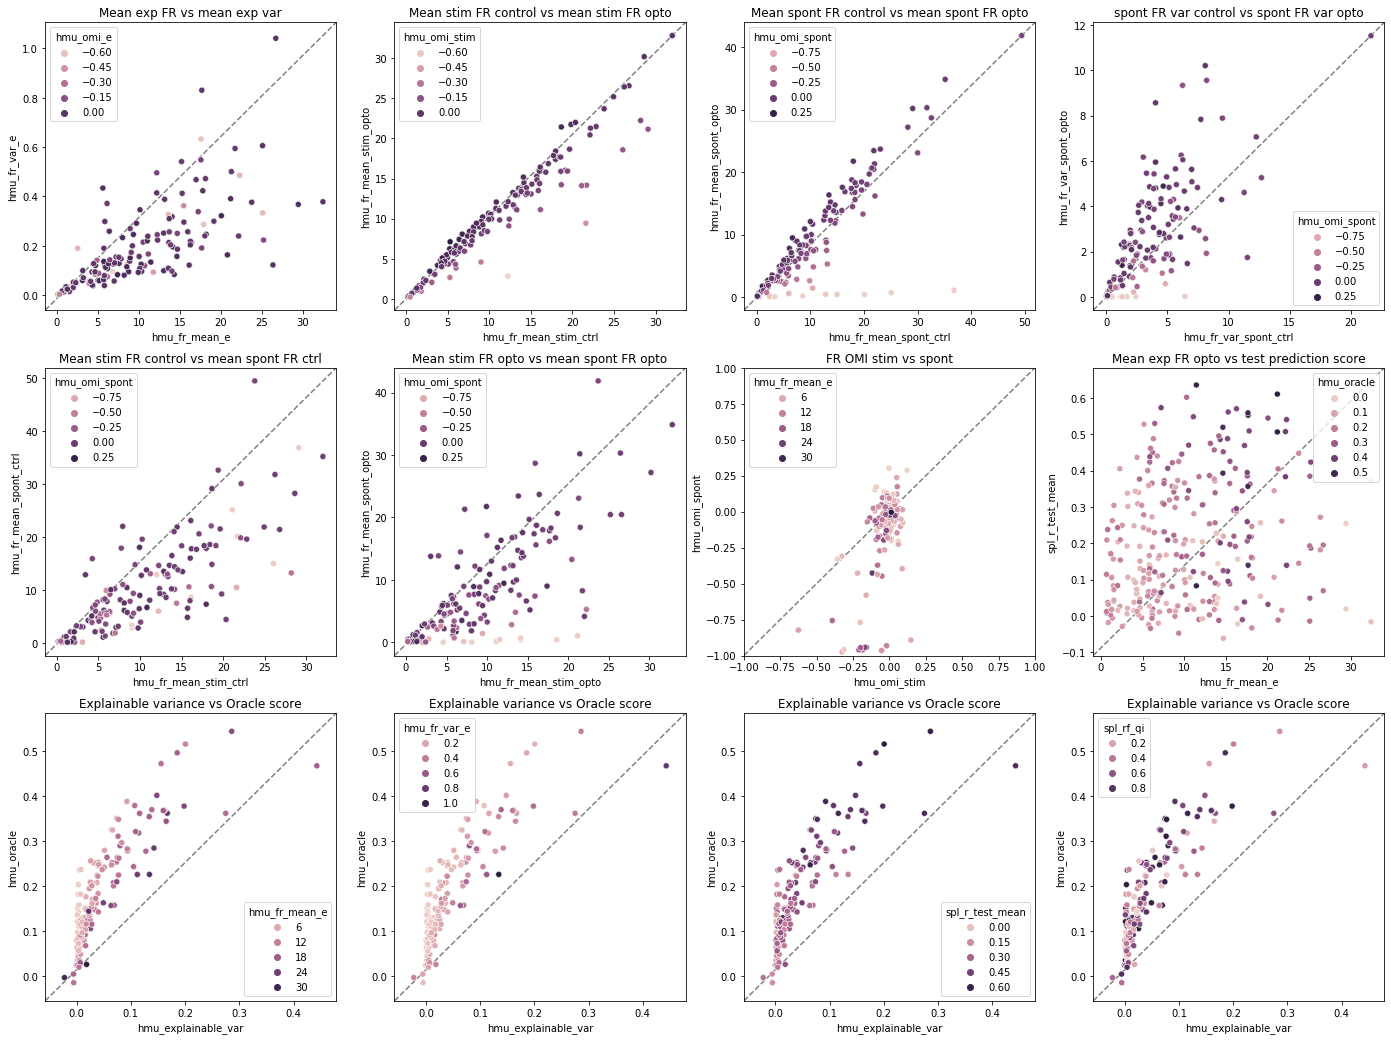

In [15]:
# Plot hmov unit parameters
fig, axs = plt.subplots(3,4, figsize=(24,18))

# axs[0,0].set(xscale='log', yscale='log')
sns.scatterplot(data=hmov_df, x='hmu_fr_mean_e', y='hmu_fr_var_e', hue='hmu_omi_e', ax=axs[0,0])
axs[0,0].plot([0, 1], [0, 1], color='grey', linestyle='--', transform=axs[0,0].transAxes, zorder=-1)
axs[0,0].set_title('Mean exp FR vs mean exp var')

sns.scatterplot(data=hmov_df, x='hmu_fr_mean_stim_ctrl', y='hmu_fr_mean_stim_opto', hue='hmu_omi_stim', ax=axs[0,1])
axs[0,1].plot([0, 1], [0, 1], color='grey', linestyle='--', transform=axs[0,1].transAxes, zorder=-1)
axs[0,1].set_title('Mean stim FR control vs mean stim FR opto')

sns.scatterplot(data=hmov_df, x='hmu_fr_mean_spont_ctrl', y='hmu_fr_mean_spont_opto', hue='hmu_omi_spont', ax=axs[0,2])
axs[0,2].plot([0, 1], [0, 1], color='grey', linestyle='--', transform=axs[0,2].transAxes, zorder=-1)
axs[0,2].set_title('Mean spont FR control vs mean spont FR opto')

sns.scatterplot(data=hmov_df[hmov_df.hmu_fr_var_spont_ctrl <= 50], x='hmu_fr_var_spont_ctrl', y='hmu_fr_var_spont_opto', hue='hmu_omi_spont', ax=axs[0,3])
axs[0,3].plot([0, 1], [0, 1], color='grey', linestyle='--', transform=axs[0,3].transAxes, zorder=-1)
axs[0,3].set_title('spont FR var control vs spont FR var opto')



sns.scatterplot(data=hmov_df, x='hmu_fr_mean_stim_ctrl', y='hmu_fr_mean_spont_ctrl', hue='hmu_omi_spont', ax=axs[1,0])
axs[1,0].plot([0, 1], [0, 1], color='grey', linestyle='--', transform=axs[1,0].transAxes, zorder=-1)
axs[1,0].set_title('Mean stim FR control vs mean spont FR ctrl')

sns.scatterplot(data=hmov_df, x='hmu_fr_mean_stim_opto', y='hmu_fr_mean_spont_opto', hue='hmu_omi_spont', ax=axs[1,1])
axs[1,1].plot([0, 1], [0, 1], color='grey', linestyle='--', transform=axs[1,1].transAxes, zorder=-1)
axs[1,1].set_title('Mean stim FR opto vs mean spont FR opto')

sns.scatterplot(data=hmov_df, x='hmu_omi_stim', y='hmu_omi_spont', hue='hmu_fr_mean_e', ax=axs[1,2])
axs[1,2].plot([0, 1], [0, 1], color='grey', linestyle='--', transform=axs[1,2].transAxes, zorder=-1)
axs[1,2].set_title('FR OMI stim vs spont')
axs[1,2].set_xlim([-1,1])
axs[1,2].set_ylim([-1,1])

sns.scatterplot(data=hmov_df, x='hmu_fr_mean_e', y='spl_r_test_mean', hue='hmu_oracle', ax=axs[1,3])
axs[1,3].plot([0, 1], [0, 1], color='grey', linestyle='--', transform=axs[1,3].transAxes, zorder=-1)
axs[1,3].set_title('Mean exp FR opto vs test prediction score')
# axs[1,3].set_axis_off()



sns.scatterplot(data=hmov_df, x='hmu_explainable_var', y='hmu_oracle', hue='hmu_fr_mean_e', ax=axs[2,0])
axs[2,0].plot([0, 1], [0, 1], color='grey', linestyle='--', transform=axs[2,0].transAxes, zorder=-1)
axs[2,0].set_title('Explainable variance vs Oracle score')

sns.scatterplot(data=hmov_df, x='hmu_explainable_var', y='hmu_oracle', hue='hmu_fr_var_e', ax=axs[2,1])
axs[2,1].plot([0, 1], [0, 1], color='grey', linestyle='--', transform=axs[2,1].transAxes, zorder=-1)
axs[2,1].set_title('Explainable variance vs Oracle score')

sns.scatterplot(data=hmov_df, x='hmu_explainable_var', y='hmu_oracle', hue='spl_r_test_mean', ax=axs[2,2])
axs[2,2].plot([0, 1], [0, 1], color='grey', linestyle='--', transform=axs[2,2].transAxes, zorder=-1)
axs[2,2].set_title('Explainable variance vs Oracle score')

sns.scatterplot(data=hmov_df, x='hmu_explainable_var', y='hmu_oracle', hue='spl_rf_qi', ax=axs[2,3])
axs[2,3].plot([0, 1], [0, 1], color='grey', linestyle='--', transform=axs[2,3].transAxes, zorder=-1)
axs[2,3].set_title('Explainable variance vs Oracle score')

# axs[2,3].set_axis_off()

### Plot all vars against one another

In [6]:
hmov_df.keys()

Index(['m', 's', 'e', 'u', 'spl_paramset', 'spl_r_train', 'spl_r_test', 'spl_r_test_repeats', 'spl_fev', 'spl_rf_qi', 'spl_rf_thresh', 'spl_rf_area', 'hm_version', 'hm_seq_num', 'hmu_fr_mean_e',
       'hmu_fr_var_e', 'hmu_fr_mean_stim', 'hmu_fr_mean_stim_ctrl', 'hmu_fr_var_stim_ctrl', 'hmu_fr_mean_stim_opto', 'hmu_fr_var_stim_opto', 'hmu_fr_mean_spont_ctrl', 'hmu_fr_var_spont_ctrl',
       'hmu_fr_mean_spont_opto', 'hmu_fr_var_spont_opto', 'hmu_omi_e', 'hmu_omi_stim', 'hmu_omi_spont', 'hmu_oracle', 'hmu_explainable_var', 'hmu_sta_corrected', 'hmu_ts'],
      dtype='object')

In [12]:
hmov_df2 = hmov_df[['spl_r_train', 'spl_r_test_mean', 'spl_fev', 'spl_rf_qi', 'spl_rf_thresh', 'spl_rf_area', 'hmu_fr_mean_e',
       'hmu_fr_var_e', 'hmu_fr_mean_stim', 'hmu_fr_mean_stim_ctrl', 'hmu_fr_var_stim_ctrl', 'hmu_fr_mean_stim_opto', 'hmu_fr_var_stim_opto', 'hmu_fr_mean_spont_ctrl', 'hmu_fr_var_spont_ctrl',
       'hmu_fr_mean_spont_opto', 'hmu_fr_var_spont_opto', 'hmu_omi_e', 'hmu_omi_stim', 'hmu_omi_spont', 'hmu_oracle', 'hmu_explainable_var']]

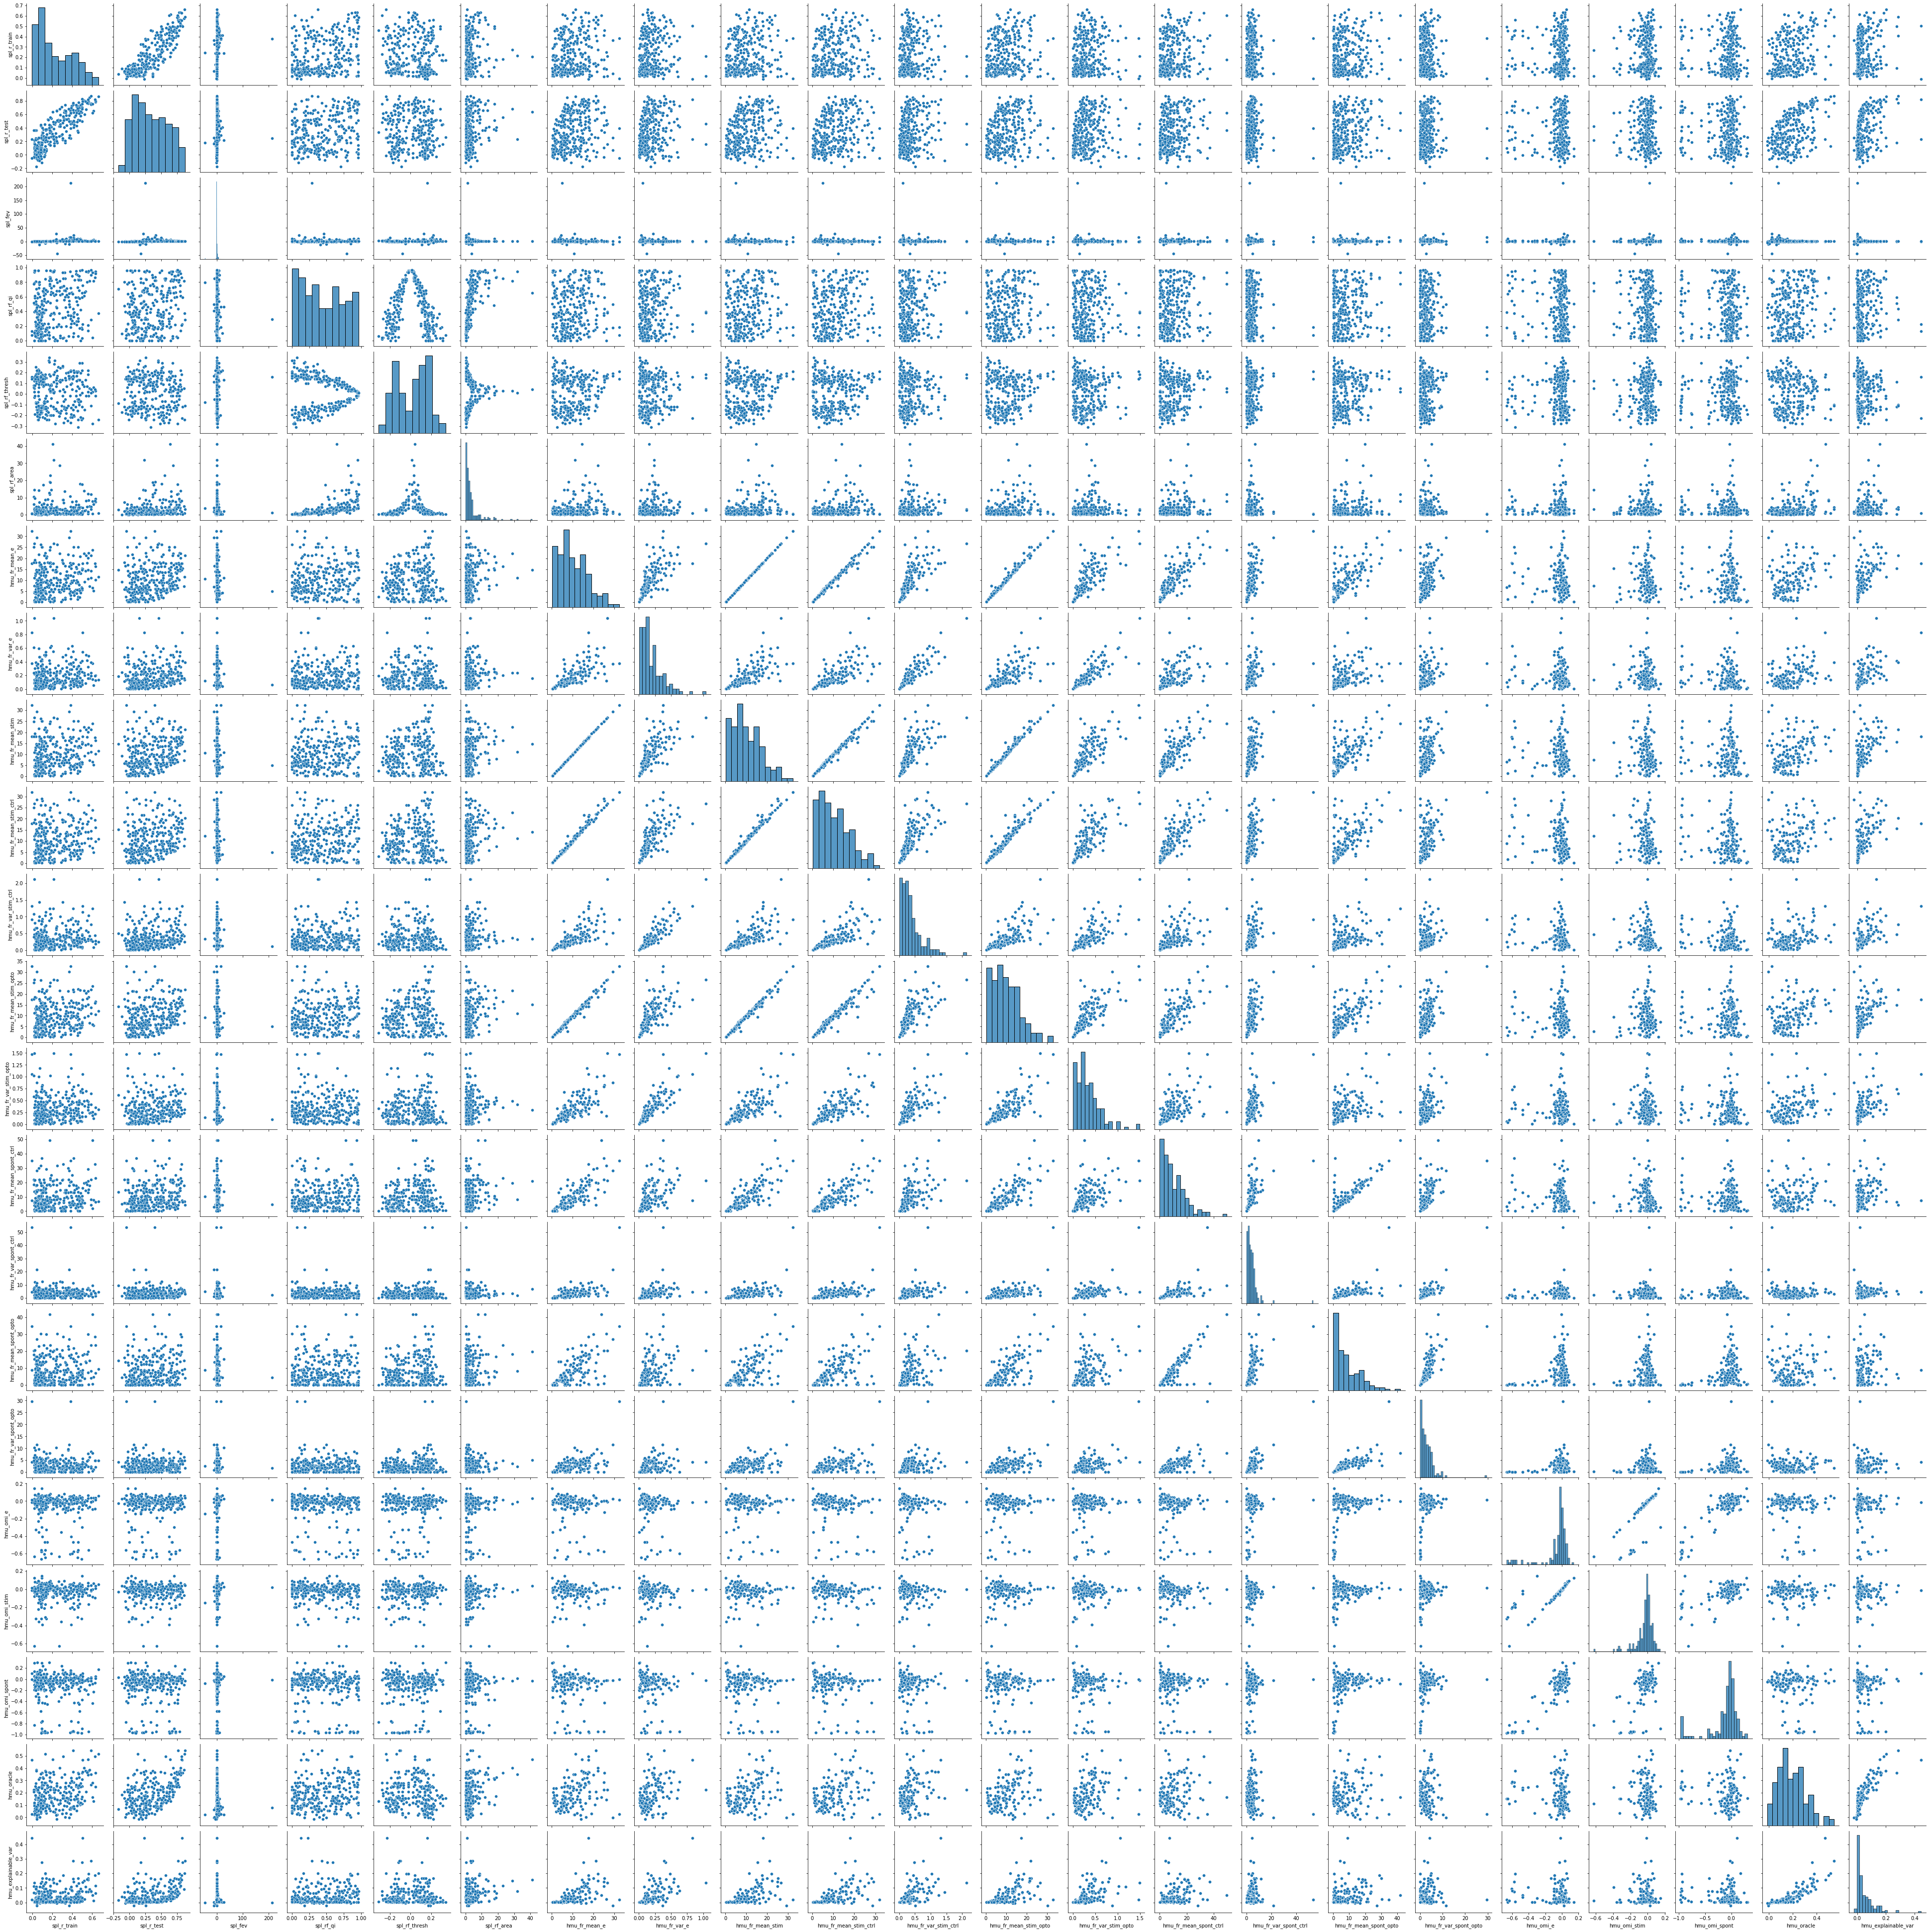

In [16]:
sns.pairplot(hmov_df2)

# Check hmov model scores against unit info

## Get unit info df

In [185]:
# Get unit info df
# unit_info = l6s_utils.get_combined_unit_info(load_df_name='unit_info_20201214')
unit_info = l6s_utils.get_combined_unit_info(load_df_name='unit_info_20210129')
unit_info

get_combined_unit_info(): Getting combined unit info.
  Loading previous mseu df file:
   /Users/ybauer/GDrive/BBE_BusseBerensEuler/projects/ct-fb_L6_suppression/analyses/L6_suppression/l6s/unit_crit_and_type_info/data/unit_info_20210129.csv


m  s   e    u s_region                 e_name  OSI_ctrl  OSI_opto  DSI_ctrl  DSI_opto  ...  tun_rsq_opto c_zscore   fr_mean   fr_ctrl   fr_opto  fr_spon_ctrl  fr_spon_opto  \
0     Ntsr1Cre_2019_0002  3   1   13      LGN    AsparseNoise5_60deg       NaN       NaN       NaN       NaN  ...           NaN      NaN       NaN       NaN       NaN           NaN           NaN   
1     Ntsr1Cre_2019_0002  3   1   14      LGN    AsparseNoise5_60deg       NaN       NaN       NaN       NaN  ...           NaN      NaN       NaN       NaN       NaN           NaN           NaN   
2     Ntsr1Cre_2019_0002  3   1   19      LGN    AsparseNoise5_60deg       NaN       NaN       NaN       NaN  ...           NaN      NaN       NaN       NaN       NaN           NaN           NaN   
3     Ntsr1Cre_2019_0002  3   1   30      LGN    AsparseNoise5_60deg       NaN       NaN       NaN       NaN  ...           NaN      NaN       NaN       NaN       NaN           NaN           NaN   
4     Ntsr1Cre_2019_0002  3   1   40      LGN    AsparseNoise5_60deg       NaN       NaN       NaN       NaN  ...           NaN      NaN       NaN       NaN       NaN           NaN           NaN   
...                  ... ..  ..  ...      ...                    ...       ...       ...       ...       ...  ...           ...      ...       ...       ...       ...           ...           ...   
2676  Ntsr1Cre_2020_0003  2  17  140       V1  MAS_1400_200-500_ChR2       NaN       NaN       NaN       NaN  ...           NaN      NaN  0.421520  0.840047  0.002993           NaN           NaN   
2677  Ntsr1Cre_2020_0003  2  17  141       V1  MAS_1400_200-500_ChR2       NaN       NaN       NaN       NaN  ...           NaN      NaN  2.764570  2.854360  2.674780           NaN           NaN   
2678  Ntsr1Cre_2020_0003  2  17  142       V1  MAS_1400_200-500_ChR2       NaN       NaN       NaN       NaN  ...           NaN      NaN  7.063575  5.776570  8.350580           NaN           NaN   
2679  Ntsr1Cre_2020_0003  2  17  144       V1  MAS_1400_200-500_ChR2       NaN       NaN       NaN       NaN  ...           NaN      NaN  3.044920  3.047910  3.041930           NaN           NaN   
2680  Ntsr1Cre_2020_0003  2  17  145       V1  MAS_1400_200-500_ChR2       NaN       NaN       NaN       NaN  ...           NaN      NaN  9.902480  9.844120  9.960840           NaN           NaN   

           OMI  SNR_opto  SNR_ctrl  
0          NaN       NaN       NaN  
1          NaN       NaN       NaN  
2          NaN       NaN       NaN  
3          NaN       NaN       NaN  
4          NaN       NaN       NaN  
...        ...       ...       ...  
2676 -0.992899       NaN       NaN  
2677 -0.032479       NaN       NaN  
2678  0.182203       NaN       NaN  
2679 -0.000982       NaN       NaN  
2680  0.005893       NaN       NaN  

[2681 rows x 29 columns]

In [17]:
unit_info.keys()

Index(['m', 's', 'e', 'u', 's_region', 'e_name', 'tun_model', 'tun_rsq_ctrl', 'tun_rsq_opto', 'c_zscore', 'fr_mean', 'fr_mean_sem', 'fr_ctrl', 'fr_ctrl_sem', 'fr_opto', 'fr_opto_sem', 'fr_spon_ctrl',
       'fr_spon_ctrl_sem', 'fr_spon_opto', 'fr_spon_opto_sem', 'OMI', 'SNR_opto', 'SNR_ctrl', 'OSI_ctrl', 'OSI_opto', 'DSI_ctrl', 'DSI_opto', 'sbc_zscore', 'sbc_method', 'sbc', 'chirp_type',
       'wave_type', 'burst_ratio_ctrl', 'burst_ratio_opto'],
      dtype='object')

## Check hmov model prediction quality against OSI/DSI - are high OSI/DSI cells harder to predict?
NOTES
- OSI/DSI are mseu-specific, i.e. per experiment > choose best expt to get to msu level
- model evaluation criteria are mseup-specific, i.e. per unit-parameterset > use get_best_model() to get to msu level

In [186]:
# Reduce unit_info to OSI and DSI info
df = unit_info[unit_info['OSI_ctrl'].notna()][['m','s','u', 'OSI_ctrl', 'OSI_opto', 'DSI_ctrl', 'DSI_opto', 'sbc_zscore']]
df

m  s    u  OSI_ctrl  OSI_opto  DSI_ctrl  DSI_opto  sbc_zscore
16    Ntsr1Cre_2019_0002  3   13  0.058347  0.015818  0.003239  0.081268    3.288161
17    Ntsr1Cre_2019_0002  3   14  0.019194  0.067131  0.093939  0.070952    7.661878
18    Ntsr1Cre_2019_0002  3   19  0.132265  0.150986  0.242817  0.033709    4.236185
19    Ntsr1Cre_2019_0002  3   30  0.122563  0.020055  0.086487  0.127151    5.810582
20    Ntsr1Cre_2019_0002  3   40  0.030719  0.052259  0.101183  0.115787    6.814885
...                  ... ..  ...       ...       ...       ...       ...         ...
2330  Ntsr1Cre_2020_0003  2  140  0.170723       NaN  0.249979       NaN   -4.116580
2331  Ntsr1Cre_2020_0003  2  141  0.024439  0.221922  0.153650  0.159621   -1.495771
2332  Ntsr1Cre_2020_0003  2  142  0.067109  0.215459  0.390109  0.009746   -0.381187
2333  Ntsr1Cre_2020_0003  2  144  0.127381  0.117249  0.012778  0.004852    4.357320
2334  Ntsr1Cre_2020_0003  2  145  0.295483  0.080935  0.658703  0.459263    0.814718

[353 rows x 8 columns]

In [187]:
# Choose best OSI-value per unit (in case of duplicate experiments)
best_exp_idx = []
for i, group in df.groupby(['m','s','u']):
    best_exp_idx.append(group['OSI_ctrl'].idxmax())

df = df.loc[best_exp_idx]
df

m  s    u  OSI_ctrl  OSI_opto  DSI_ctrl  DSI_opto  sbc_zscore
16    Ntsr1Cre_2019_0002  3   13  0.058347  0.015818  0.003239  0.081268    3.288161
17    Ntsr1Cre_2019_0002  3   14  0.019194  0.067131  0.093939  0.070952    7.661878
18    Ntsr1Cre_2019_0002  3   19  0.132265  0.150986  0.242817  0.033709    4.236185
19    Ntsr1Cre_2019_0002  3   30  0.122563  0.020055  0.086487  0.127151    5.810582
20    Ntsr1Cre_2019_0002  3   40  0.030719  0.052259  0.101183  0.115787    6.814885
...                  ... ..  ...       ...       ...       ...       ...         ...
2295  Ntsr1Cre_2020_0003  2  140  0.330171       NaN  0.178002       NaN   -3.153398
2296  Ntsr1Cre_2020_0003  2  141  0.229081  0.240891  0.298035  0.052793   -0.424875
2297  Ntsr1Cre_2020_0003  2  142  0.131872  0.056591  0.005426  0.022503   -0.174719
2333  Ntsr1Cre_2020_0003  2  144  0.127381  0.117249  0.012778  0.004852    4.357320
2334  Ntsr1Cre_2020_0003  2  145  0.295483  0.080935  0.658703  0.459263    0.814718

[252 rows x 8 columns]

In [188]:
# Add chirp type to df
chirp_df = unit_info[unit_info['chirp_type'].notna()][['m', 's', 'u', 'chirp_type']]
chirp_df

m  s   u     chirp_type
40    Ntsr1Cre_2019_0002  3  13       ON-sust.
41    Ntsr1Cre_2019_0002  3  14  ON-OFF-trans.
42    Ntsr1Cre_2019_0002  3  19          mixed
43    Ntsr1Cre_2019_0002  3  30  ON-OFF-trans.
44    Ntsr1Cre_2019_0002  3  40  ON-OFF-trans.
...                  ... ..  ..            ...
2109  Ntsr1Cre_2020_0002  6  18  ON-OFF-trans.
2110  Ntsr1Cre_2020_0002  6  23      OFF-sust.
2111  Ntsr1Cre_2020_0002  6  26          mixed
2112  Ntsr1Cre_2020_0002  6  27       ON-sust.
2113  Ntsr1Cre_2020_0002  6  28      OFF-sust.

[146 rows x 4 columns]

In [189]:
# Merge chirp type info
df = df.merge(chirp_df, on=['m','s','u'], how='left')
df

m  s    u  OSI_ctrl  OSI_opto  DSI_ctrl  DSI_opto  sbc_zscore     chirp_type
0    Ntsr1Cre_2019_0002  3   13  0.058347  0.015818  0.003239  0.081268    3.288161       ON-sust.
1    Ntsr1Cre_2019_0002  3   14  0.019194  0.067131  0.093939  0.070952    7.661878  ON-OFF-trans.
2    Ntsr1Cre_2019_0002  3   19  0.132265  0.150986  0.242817  0.033709    4.236185          mixed
3    Ntsr1Cre_2019_0002  3   30  0.122563  0.020055  0.086487  0.127151    5.810582  ON-OFF-trans.
4    Ntsr1Cre_2019_0002  3   40  0.030719  0.052259  0.101183  0.115787    6.814885  ON-OFF-trans.
..                  ... ..  ...       ...       ...       ...       ...         ...            ...
247  Ntsr1Cre_2020_0003  2  140  0.330171       NaN  0.178002       NaN   -3.153398            NaN
248  Ntsr1Cre_2020_0003  2  141  0.229081  0.240891  0.298035  0.052793   -0.424875            NaN
249  Ntsr1Cre_2020_0003  2  142  0.131872  0.056591  0.005426  0.022503   -0.174719            NaN
250  Ntsr1Cre_2020_0003  2  144  0.127381  0.117249  0.012778  0.004852    4.357320            NaN
251  Ntsr1Cre_2020_0003  2  145  0.295483  0.080935  0.658703  0.459263    0.814718            NaN

[252 rows x 9 columns]

In [190]:
# Get SplineLNP model prediction evaluation scores for selected units
splnp = pd.DataFrame((SplineLNP.Eval() & df).fetch(dj.key, 'spl_r_test_mean', 'spl_rf_area', 'spl_rf_thresh', 'spl_rf_val', 'spl_rf_pos_pix', as_dict=True))
splnp

m  s  e   u  spl_paramset  spl_r_test_mean  spl_rf_thresh  spl_rf_area spl_rf_pos_pix  spl_rf_val
0    Ntsr1Cre_2019_0007  6  9   1             7         0.020900           0.14         1.50         [8, 6]    0.209858
1    Ntsr1Cre_2019_0007  6  9   1             8         0.337829           0.22         1.00       [13, 13]    0.335369
2    Ntsr1Cre_2019_0007  6  9   3             7         0.007447          -0.19         1.75        [22, 4]   -0.455350
3    Ntsr1Cre_2019_0007  6  9   3             8         0.208899           0.34         0.25        [13, 2]    0.367551
4    Ntsr1Cre_2019_0007  6  9   4             7        -0.016071           0.12         2.75         [2, 2]    0.242954
..                  ... .. ..  ..           ...              ...            ...          ...            ...         ...
291  Ntsr1Cre_2020_0002  6  6  33             8         0.256422           0.13         3.00        [17, 7]    0.360110
292  Ntsr1Cre_2020_0002  6  6  38             7         0.033686           0.16         2.00       [20, 11]    0.294966
293  Ntsr1Cre_2020_0002  6  6  38             8         0.227715           0.07         4.25       [20, 11]    0.437535
294  Ntsr1Cre_2020_0002  6  6  42             7        -0.016675           0.14         0.50        [15, 7]    0.151351
295  Ntsr1Cre_2020_0002  6  6  42             8         0.372873           0.21         0.25       [13, 13]    0.258143

[296 rows x 10 columns]

In [191]:
# Choose best model per unit (in case of duplicates)
# NOTE: can now use functino get_best_model()
best_idx = []
for i, group in splnp.groupby(['m','s','u']):
    best_idx.append(group['spl_r_test_mean'].idxmax())

splnp = splnp.loc[best_idx]
splnp = splnp.drop('e', axis=1)
splnp

m  s   u  spl_paramset  spl_r_test_mean  spl_rf_thresh  spl_rf_area spl_rf_pos_pix  spl_rf_val
1    Ntsr1Cre_2019_0007  6   1             8         0.337829           0.22         1.00       [13, 13]    0.335369
3    Ntsr1Cre_2019_0007  6   3             8         0.208899           0.34         0.25        [13, 2]    0.367551
5    Ntsr1Cre_2019_0007  6   4             8         0.058029          -0.15         0.75        [2, 14]   -0.184879
7    Ntsr1Cre_2019_0007  6   5             8         0.025170          -0.11         2.50       [22, 13]   -0.480096
9    Ntsr1Cre_2019_0007  6   7             8         0.278282          -0.27         0.25        [15, 2]   -0.281096
..                  ... ..  ..           ...              ...            ...          ...            ...         ...
287  Ntsr1Cre_2020_0002  6  28             8         0.610910          -0.11         3.25       [10, 13]   -0.154007
289  Ntsr1Cre_2020_0002  6  30             8         0.219310          -0.14         2.50        [13, 5]   -0.381127
291  Ntsr1Cre_2020_0002  6  33             8         0.256422           0.13         3.00        [17, 7]    0.360110
293  Ntsr1Cre_2020_0002  6  38             8         0.227715           0.07         4.25       [20, 11]    0.437535
295  Ntsr1Cre_2020_0002  6  42             8         0.372873           0.21         0.25       [13, 13]    0.258143

[131 rows x 9 columns]

In [192]:
# Merge Spline LNP model scores into OSI/DSI df
df = df.merge(splnp, on=['m','s','u'], how='inner')
df

m  s   u  OSI_ctrl  OSI_opto  DSI_ctrl  DSI_opto  sbc_zscore chirp_type  spl_paramset  spl_r_test_mean  spl_rf_thresh  spl_rf_area spl_rf_pos_pix  spl_rf_val
0    Ntsr1Cre_2019_0007  6   1  0.242542  0.222695  0.648497  0.176604   -1.211025        NaN             8         0.337829           0.22         1.00       [13, 13]    0.335369
1    Ntsr1Cre_2019_0007  6   3  0.235136  0.141376  0.304742  0.405608   -1.739985        NaN             8         0.208899           0.34         0.25        [13, 2]    0.367551
2    Ntsr1Cre_2019_0007  6   4  0.224998  0.158770  0.123038  0.205742   -0.192270        NaN             8         0.058029          -0.15         0.75        [2, 14]   -0.184879
3    Ntsr1Cre_2019_0007  6   5  0.280084  0.148429  0.364947  0.482982   -1.775767        NaN             8         0.025170          -0.11         2.50       [22, 13]   -0.480096
4    Ntsr1Cre_2019_0007  6   7  0.171398  0.227221  0.090399  0.261320   -1.395056  OFF-sust.             8         0.278282          -0.27         0.25        [15, 2]   -0.281096
..                  ... ..  ..       ...       ...       ...       ...         ...        ...           ...              ...            ...          ...            ...         ...
126  Ntsr1Cre_2020_0002  6  28  0.056904  0.016069  0.336862  0.102671    0.685934  OFF-sust.             8         0.610910          -0.11         3.25       [10, 13]   -0.154007
127  Ntsr1Cre_2020_0002  6  30  0.056474  0.026930  0.002408  0.168507    1.611627        NaN             8         0.219310          -0.14         2.50        [13, 5]   -0.381127
128  Ntsr1Cre_2020_0002  6  33  0.050882  0.061101  0.038114  0.001934    2.877018        NaN             8         0.256422           0.13         3.00        [17, 7]    0.360110
129  Ntsr1Cre_2020_0002  6  38  0.035581  0.079042  0.114845  0.040818    0.717707        NaN             8         0.227715           0.07         4.25       [20, 11]    0.437535
130  Ntsr1Cre_2020_0002  6  42  0.058159  0.055284  0.106481  0.035697    1.335863        NaN             8         0.372873           0.21         0.25       [13, 13]    0.258143

[131 rows x 15 columns]

In [81]:
# Plot scatter plot of OSI/DSI (control) vs model prediction vs RF area
fig, axs = plt.subplots(2,2, figsize=(12,12), dpi=90)

# OSI
sns.scatterplot(data=df, x='OSI_ctrl', y='spl_r_test_mean', size='spl_rf_area', hue='spl_rf_area', ax=axs[0,0])
axs[0,0].plot([0, 1], [0, 1], color='grey', linestyle='--', transform=axs[0,0].transAxes, zorder=-1)
axs[0,0].set_title('OSI vs model prediction vs area')

# DSI
sns.scatterplot(data=df, x='DSI_ctrl', y='spl_r_test_mean', size='spl_rf_area', hue='spl_rf_area', ax=axs[0,1])
axs[0,1].set_title('DSI vs model prediction vs area')
axs[0,1].plot([0, 1], [0, 1], color='grey', linestyle='--', transform=axs[0,1].transAxes, zorder=-1);


# OSI
sns.scatterplot(data=df, x='OSI_ctrl', y='spl_r_test_mean', size='spl_rf_area', hue='spl_rf_val', palette='coolwarm', ax=axs[1,0])
axs[1,0].plot([0, 1], [0, 1], color='grey', linestyle='--', transform=axs[1,0].transAxes, zorder=-1)
axs[1,0].set_title('OSI vs model prediction vs area vs polarity')

# DSI
sns.scatterplot(data=df, x='DSI_ctrl', y='spl_r_test_mean', size='spl_rf_area', hue='spl_rf_val', palette='coolwarm', ax=axs[1,1])
axs[1,1].set_title('DSI vs model prediction vs area vs polarity')
axs[1,1].plot([0, 1], [0, 1], color='grey', linestyle='--', transform=axs[1,1].transAxes, zorder=-1);

### Check hmov model X OSI/DSI X chirp_type
NOTE: NaN chirp types are likely low SNR cells that would not pass quality threshold

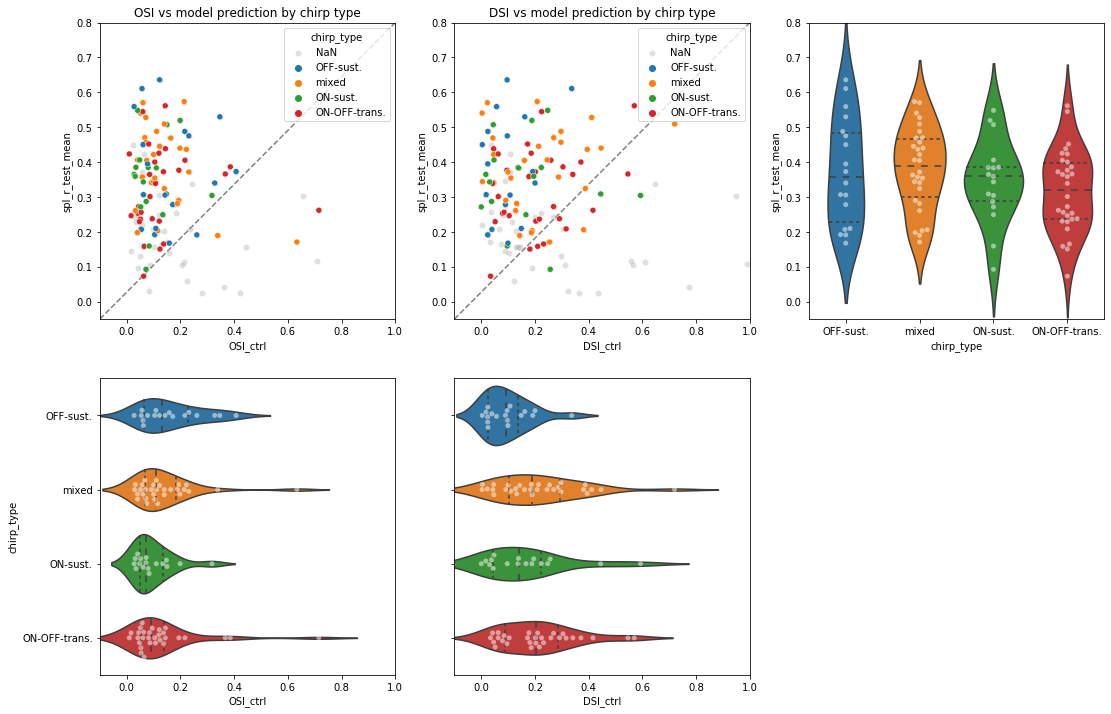

In [194]:
# Plot scatter plot of OSI/DSI (control) vs model prediction by chirp type
# NOTE: using seaborn seems more efficient than having to hard code each type or looping through the df.groupby('chirp_type')
fig, axs = plt.subplots(2,3, figsize=(18,12), sharex=False, sharey=False)


sns.scatterplot(data=df, x='OSI_ctrl', y='spl_r_test_mean', color='grey', alpha=0.25, ax=axs[0,0], label='NaN')
sns.scatterplot(data=df, x='OSI_ctrl', y='spl_r_test_mean', hue='chirp_type', ax=axs[0,0])
axs[0,0].plot([0, 1], [0, 1], color='grey', linestyle='--', transform=axs[0,0].transAxes, zorder=-1)
axs[0,0].set_title('OSI vs model prediction by chirp type')
axs[0,0].set_xlim(-0.1,1)
axs[0,0].set_ylim(-0.05,0.8)

# axs[0,1].get_shared_x_axes().join(axs[0,0], axs[0,1])
sns.scatterplot(data=df, x='DSI_ctrl', y='spl_r_test_mean', color='grey',alpha=0.25, ax=axs[0,1], label='NaN')
sns.scatterplot(data=df, x='DSI_ctrl', y='spl_r_test_mean', hue='chirp_type', ax=axs[0,1])
axs[0,1].plot([0, 1], [0, 1], color='grey', linestyle='--', transform=axs[0,1].transAxes, zorder=-1)
axs[0,1].set_title('DSI vs model prediction by chirp type')
axs[0,1].set_xlim(-0.1,1)
axs[0,1].set_ylim(-0.05,0.8)
# axs[0,1] = axs[0,0].twinx()


sns.violinplot(data=df, x='chirp_type', y='spl_r_test_mean', inner='quartile', ax=axs[0,2])
sns.swarmplot(data=df, x='chirp_type', y='spl_r_test_mean', color='white', edgecolor='gray', alpha=0.5, ax=axs[0,2])
axs[0,2].set_ylim(-0.05,0.8)

sns.violinplot(data=df, x='OSI_ctrl', y='chirp_type', inner='quartile', orient='h', ax=axs[1,0])
sns.swarmplot(data=df, x='OSI_ctrl', y='chirp_type', color='white', edgecolor='gray', alpha=0.5, ax=axs[1,0])
axs[1,0].set_xlim(-0.1,1)

sns.violinplot(data=df, x='DSI_ctrl', y='chirp_type', inner='quartile', orient='h', ax=axs[1,1])
sns.swarmplot(data=df, x='DSI_ctrl', y='chirp_type', color='white', edgecolor='gray', alpha=0.5, ax=axs[1,1])
axs[1,1].set_xlim(-0.1,1)
axs[1,1].set_yticklabels('')
axs[1,1].set_ylabel('')

axs[1,2].set_axis_off()

### Check hmov model X OSI/DSI X mouse and series - check for batch effects

Text(0.5, 1.0, 'DSI vs model prediction by mouse')

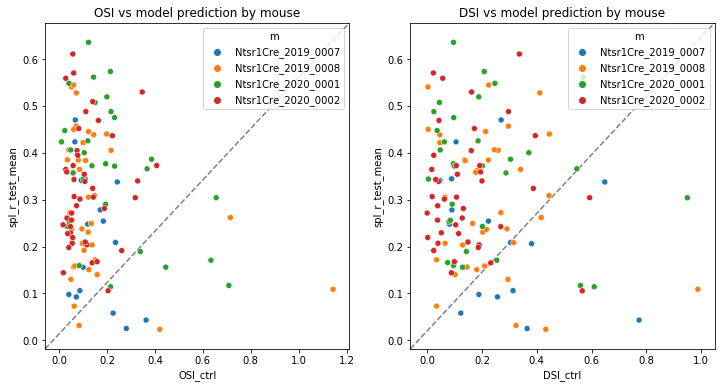

In [195]:
# Plot scatter plot of OSI/DSI (control) vs model prediction by mouse
fig, axs = plt.subplots(1,2, figsize=(12,6))

sns.scatterplot(data=df, x='OSI_ctrl', y='spl_r_test_mean', hue='m', ax=axs[0])
axs[0].plot([0, 1], [0, 1], color='grey', linestyle='--', transform=axs[0].transAxes, zorder=-1)
axs[0].set_title('OSI vs model prediction by mouse')

sns.scatterplot(data=df, x='DSI_ctrl', y='spl_r_test_mean', hue='m', ax=axs[1])
axs[1].plot([0, 1], [0, 1], color='grey', linestyle='--', transform=axs[1].transAxes, zorder=-1)
axs[1].set_title('DSI vs model prediction by mouse')

In [196]:
# Plot scatter plot of OSI/DSI (control) vs model prediction by series
fig, axs = plt.subplots(1,2, figsize=(12,6))

sns.scatterplot(data=df, x='OSI_ctrl', y='spl_r_test_mean', hue='m', palette='bright', style='s', ax=axs[0])
axs[0].plot([0, 1], [0, 1], color='grey', linestyle='--', transform=axs[0].transAxes, zorder=-1)
axs[0].set_title('OSI vs model prediction by series')

sns.scatterplot(data=df, x='DSI_ctrl', y='spl_r_test_mean', hue='m', palette='bright',style='s', ax=axs[1])
axs[1].plot([0, 1], [0, 1], color='grey', linestyle='--', transform=axs[1].transAxes, zorder=-1)
axs[1].set_title('DSI vs model prediction by series')

Text(0.5, 1.0, 'DSI vs model prediction by series')

## Check hmov model prediction quality against SbC zscores

In [197]:
# Reduce unit_info to OSI and DSI info
df = unit_info[unit_info['sbc_zscore'].notna()][['m','s','u','sbc_zscore']]
df

m  s    u  sbc_zscore
16    Ntsr1Cre_2019_0002  3   13    3.288161
17    Ntsr1Cre_2019_0002  3   14    7.661878
18    Ntsr1Cre_2019_0002  3   19    4.236185
19    Ntsr1Cre_2019_0002  3   30    5.810582
20    Ntsr1Cre_2019_0002  3   40    6.814885
...                  ... ..  ...         ...
2364  Ntsr1Cre_2020_0003  2  140    0.876844
2365  Ntsr1Cre_2020_0003  2  141    0.153820
2366  Ntsr1Cre_2020_0003  2  142    0.074350
2367  Ntsr1Cre_2020_0003  2  144    3.841556
2368  Ntsr1Cre_2020_0003  2  145    1.131615

[571 rows x 4 columns]

In [198]:
# Merge Spline LNP model scores into SbC df
df = df.merge(splnp, on=['m','s','u'], how='inner')
df

m  s   u  sbc_zscore  spl_paramset  spl_r_test_mean  spl_rf_thresh  spl_rf_area spl_rf_pos_pix  spl_rf_val
0    Ntsr1Cre_2019_0007  6   1   -1.211025             8         0.337829           0.22         1.00       [13, 13]    0.335369
1    Ntsr1Cre_2019_0007  6   1    1.468678             8         0.337829           0.22         1.00       [13, 13]    0.335369
2    Ntsr1Cre_2019_0007  6   3   -1.739985             8         0.208899           0.34         0.25        [13, 2]    0.367551
3    Ntsr1Cre_2019_0007  6   3    0.447155             8         0.208899           0.34         0.25        [13, 2]    0.367551
4    Ntsr1Cre_2019_0007  6   4   -1.953135             8         0.058029          -0.15         0.75        [2, 14]   -0.184879
..                  ... ..  ..         ...           ...              ...            ...          ...            ...         ...
278  Ntsr1Cre_2020_0002  6  33    1.231234             8         0.256422           0.13         3.00        [17, 7]    0.360110
279  Ntsr1Cre_2020_0002  6  38    0.717707             8         0.227715           0.07         4.25       [20, 11]    0.437535
280  Ntsr1Cre_2020_0002  6  38    0.208226             8         0.227715           0.07         4.25       [20, 11]    0.437535
281  Ntsr1Cre_2020_0002  6  42    1.335863             8         0.372873           0.21         0.25       [13, 13]    0.258143
282  Ntsr1Cre_2020_0002  6  42    0.319793             8         0.372873           0.21         0.25       [13, 13]    0.258143

[283 rows x 10 columns]

In [199]:
# Merge chirp type info
df = df.merge(chirp_df, on=['m','s','u'], how='left')
df

m  s   u  sbc_zscore  spl_paramset  spl_r_test_mean  spl_rf_thresh  spl_rf_area spl_rf_pos_pix  spl_rf_val chirp_type
0    Ntsr1Cre_2019_0007  6   1   -1.211025             8         0.337829           0.22         1.00       [13, 13]    0.335369        NaN
1    Ntsr1Cre_2019_0007  6   1    1.468678             8         0.337829           0.22         1.00       [13, 13]    0.335369        NaN
2    Ntsr1Cre_2019_0007  6   3   -1.739985             8         0.208899           0.34         0.25        [13, 2]    0.367551        NaN
3    Ntsr1Cre_2019_0007  6   3    0.447155             8         0.208899           0.34         0.25        [13, 2]    0.367551        NaN
4    Ntsr1Cre_2019_0007  6   4   -1.953135             8         0.058029          -0.15         0.75        [2, 14]   -0.184879        NaN
..                  ... ..  ..         ...           ...              ...            ...          ...            ...         ...        ...
278  Ntsr1Cre_2020_0002  6  33    1.231234             8         0.256422           0.13         3.00        [17, 7]    0.360110        NaN
279  Ntsr1Cre_2020_0002  6  38    0.717707             8         0.227715           0.07         4.25       [20, 11]    0.437535        NaN
280  Ntsr1Cre_2020_0002  6  38    0.208226             8         0.227715           0.07         4.25       [20, 11]    0.437535        NaN
281  Ntsr1Cre_2020_0002  6  42    1.335863             8         0.372873           0.21         0.25       [13, 13]    0.258143        NaN
282  Ntsr1Cre_2020_0002  6  42    0.319793             8         0.372873           0.21         0.25       [13, 13]    0.258143        NaN

[283 rows x 11 columns]

Text(0.5, 1, 'SbC score vs model prediction')

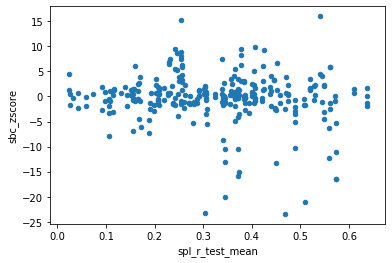

In [200]:
# Plot scatter plot of SbC score vs model prediction
df.plot.scatter(x='spl_r_test_mean', y='sbc_zscore');
axs[0].plot([0, 1], [0, 1], color='grey', linestyle='--', transform=axs[0].transAxes, zorder=-1)
axs[0].set_title('SbC score vs model prediction')

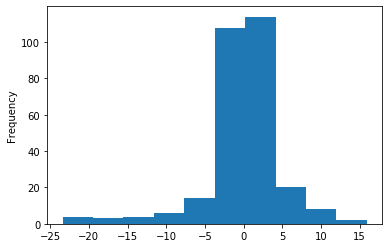

In [201]:
df['sbc_zscore'].plot.hist()

In [203]:
# Check if SbC score histogram is fine now
sns.histplot(data=df, x='sbc_zscore', hue='chirp_type', element='step', bins=40)

In [204]:
# Plot scatter plot of SbC score vs model prediction (and chirp type)
fig, axs = plt.subplots(2,2, figsize=(12,12))

df.plot.scatter(x='sbc_zscore', y='spl_r_test_mean', ax=axs[0,0]);
axs[0,0].plot([0, 1], [0, 1], color='grey', linestyle='--', transform=axs[0,0].transAxes, zorder=-1)
axs[0,0].set_title('SbC score vs model prediction')

sns.scatterplot(data=df, x='sbc_zscore', y='spl_r_test_mean', ax=axs[0,1], color='grey', label='NaN')
sns.scatterplot(data=df, x='sbc_zscore', y='spl_r_test_mean', hue='chirp_type', ax=axs[0,1])
axs[0,1].plot([0, 1], [0, 1], color='grey', linestyle='--', transform=axs[0,1].transAxes, zorder=-1)
axs[0,1].set_title('SbC score vs model prediction by chirp type')

sns.histplot(data=df, x='sbc_zscore', element='step', ax=axs[1,0])#, bins=40)
# sns.histplot(data=df[(df.chirp_type=='ON-sust.') | (df.chirp_type=='OFF-sust.')],
#              x='sbc_zscore', hue='chirp_type', element='step', ax=axs[1,1])#, bins=40)
sns.histplot(data=df, x='sbc_zscore', hue='chirp_type', element='step', ax=axs[1,1])#, bins=40)
# sns.kdeplot(data=df, x='sbc_zscore', hue='chirp_type', ax=axs[1,1])#, bins=40)

## Check SbCs X area X polarity X chirp type - do SbCs have large areas and negative polarity and are they OFF-sust. cells?

In [205]:
df

m  s   u  sbc_zscore  spl_paramset  spl_r_test_mean  spl_rf_thresh  spl_rf_area spl_rf_pos_pix  spl_rf_val chirp_type
0    Ntsr1Cre_2019_0007  6   1   -1.211025             8         0.337829           0.22         1.00       [13, 13]    0.335369        NaN
1    Ntsr1Cre_2019_0007  6   1    1.468678             8         0.337829           0.22         1.00       [13, 13]    0.335369        NaN
2    Ntsr1Cre_2019_0007  6   3   -1.739985             8         0.208899           0.34         0.25        [13, 2]    0.367551        NaN
3    Ntsr1Cre_2019_0007  6   3    0.447155             8         0.208899           0.34         0.25        [13, 2]    0.367551        NaN
4    Ntsr1Cre_2019_0007  6   4   -1.953135             8         0.058029          -0.15         0.75        [2, 14]   -0.184879        NaN
..                  ... ..  ..         ...           ...              ...            ...          ...            ...         ...        ...
278  Ntsr1Cre_2020_0002  6  33    1.231234             8         0.256422           0.13         3.00        [17, 7]    0.360110        NaN
279  Ntsr1Cre_2020_0002  6  38    0.717707             8         0.227715           0.07         4.25       [20, 11]    0.437535        NaN
280  Ntsr1Cre_2020_0002  6  38    0.208226             8         0.227715           0.07         4.25       [20, 11]    0.437535        NaN
281  Ntsr1Cre_2020_0002  6  42    1.335863             8         0.372873           0.21         0.25       [13, 13]    0.258143        NaN
282  Ntsr1Cre_2020_0002  6  42    0.319793             8         0.372873           0.21         0.25       [13, 13]    0.258143        NaN

[283 rows x 11 columns]

Text(0.5, 1.0, 'SbC score vs model prediction by chirp type')

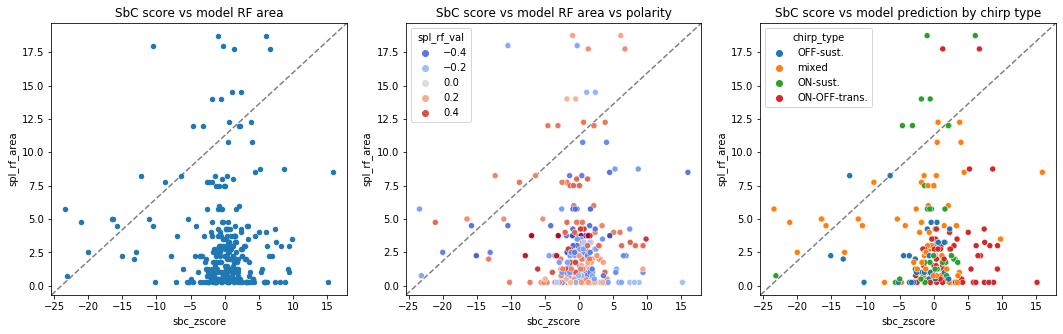

In [206]:
# Plot scatter plot of SbC score vs area vs polarity vs chirp type
fig, axs = plt.subplots(1,3, figsize=(18,5))

df.plot.scatter(x='sbc_zscore', y='spl_rf_area', ax=axs[0]);
axs[0].plot([0, 1], [0, 1], color='grey', linestyle='--', transform=axs[0].transAxes, zorder=-1)
axs[0].set_title('SbC score vs model RF area');

sns.scatterplot(data=df, x='sbc_zscore', y='spl_rf_area', hue='spl_rf_val', palette='coolwarm', ax=axs[1])
axs[1].plot([0, 1], [0, 1], color='grey', linestyle='--', transform=axs[1].transAxes, zorder=-1)
axs[1].set_title('SbC score vs model RF area vs polarity');

sns.scatterplot(data=df, x='sbc_zscore', y='spl_rf_area', hue='chirp_type', ax=axs[2])
axs[2].plot([0, 1], [0, 1], color='grey', linestyle='--', transform=axs[2].transAxes, zorder=-1)
axs[2].set_title('SbC score vs model prediction by chirp type')

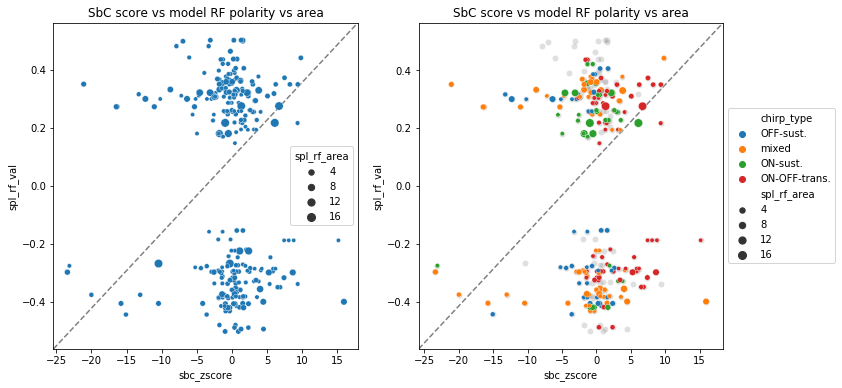

In [207]:
# Plot scatter plot of SbC score vs area
fig, axs = plt.subplots(1,2, figsize=(12,6))
# plt.subplots_adjust(wspace=1)

sns.scatterplot(data=df, x='sbc_zscore', y='spl_rf_val', size='spl_rf_area', ax=axs[0])
axs[0].plot([0, 1], [0, 1], color='grey', linestyle='--', transform=axs[0].transAxes, zorder=-1)
axs[0].set_title('SbC score vs model RF polarity vs area');

sns.scatterplot(data=df, x='sbc_zscore', y='spl_rf_val', color='grey', alpha=0.25, ax=axs[1])
sns.scatterplot(data=df, x='sbc_zscore', y='spl_rf_val', size='spl_rf_area', hue='chirp_type', ax=axs[1])
axs[1].plot([0, 1], [0, 1], color='grey', linestyle='--', transform=axs[1].transAxes, zorder=-1)
axs[1].set_title('SbC score vs model RF polarity vs area');
axs[1].legend(loc='center left', bbox_to_anchor=(1., 0.5), ncol=1)
# axs[2].set_axis_off()



/Users/ybauer/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/ybauer/miniconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/ybauer/miniconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/Users/ybauer/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing

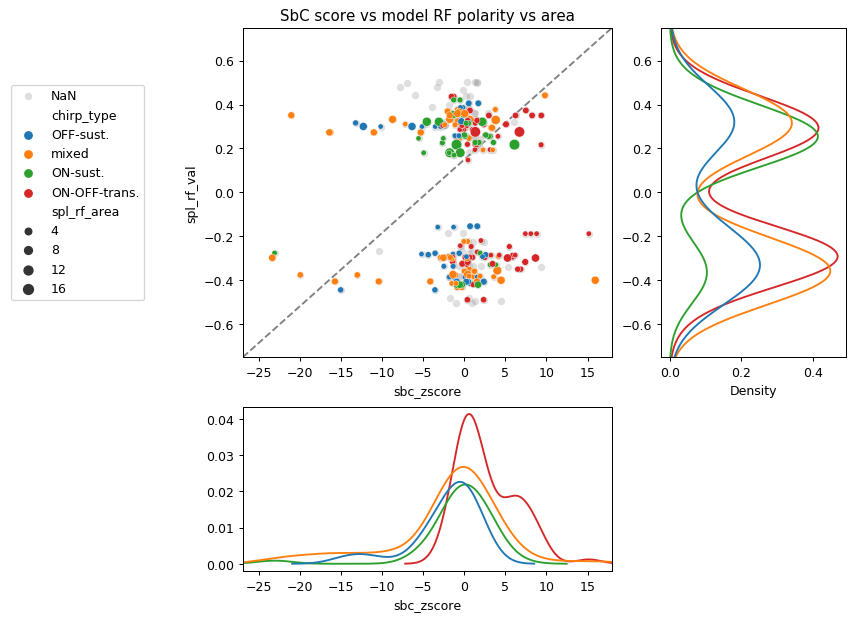

In [236]:
# Plot scatter plot of SbC score vs area
fig, axs = plt.subplots(2,3, figsize=(12,8), dpi=90, sharey=False, gridspec_kw={'width_ratios': [0.5, 1, 0.5], 'height_ratios': [1, 0.5]})
# plt.subplots_adjust(wspace=1)

axs[0,0].set_axis_off()

sns.scatterplot(data=df, x='sbc_zscore', y='spl_rf_val', color='grey', label='NaN', alpha=0.25, ax=axs[0,1])
sns.scatterplot(data=df, x='sbc_zscore', y='spl_rf_val', size='spl_rf_area', hue='chirp_type', ax=axs[0,1])
axs[0,1].plot([0, 1], [0, 1], color='grey', linestyle='--', transform=axs[0,1].transAxes, zorder=-1)
axs[0,1].set_title('SbC score vs model RF polarity vs area');
axs[0,1].legend(loc='center right', bbox_to_anchor=(-0.25, 0.5), ncol=1)
axs[0,1].set_ylim([-0.75, 0.75])
axs[0,1].set_xlim([-27, 18])

# sns.histplot(data=df, y='spl_rf_val', hue='chirp_type', element='step', ax=axs[2])#, bins=40)
sns.kdeplot(data=df, y='spl_rf_val', hue='chirp_type', fill=False, alpha=1, ax=axs[0,2])#, bins=40)
axs[0,2].legend([],[], frameon=False)
axs[0,2].set_ylabel('')
axs[0,2].set_ylim([-0.75, 0.75])
# plt.tight_layout()

axs[1,0].set_axis_off()

sns.kdeplot(data=df, x='sbc_zscore', hue='chirp_type', ax=axs[1,1])#, bins=40)
axs[1,1].set_xlim([-27, 18])
axs[1,1].set_ylabel('')
axs[1,1].legend([],[], frameon=False)

axs[1,2].set_axis_off()

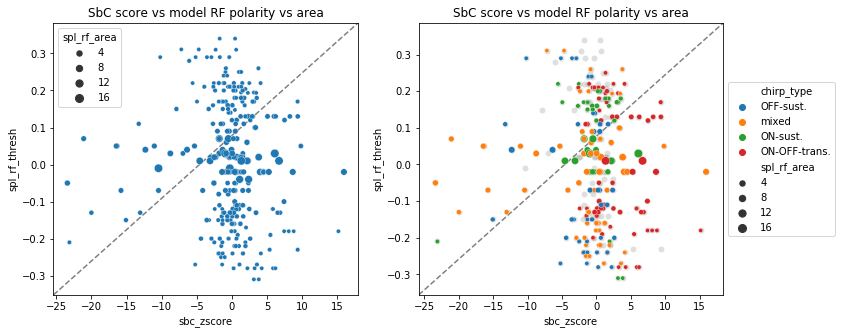

In [209]:
# Plot scatter plot of SbC score vs area
fig, axs = plt.subplots(1,2, figsize=(12,5))

sns.scatterplot(data=df, x='sbc_zscore', y='spl_rf_thresh', size='spl_rf_area', ax=axs[0])
axs[0].plot([0, 1], [0, 1], color='grey', linestyle='--', transform=axs[0].transAxes, zorder=-1)
axs[0].set_title('SbC score vs model RF polarity vs area');

sns.scatterplot(data=df, x='sbc_zscore', y='spl_rf_thresh', color='grey', alpha=0.25, ax=axs[1])
sns.scatterplot(data=df, x='sbc_zscore', y='spl_rf_thresh', size='spl_rf_area', hue='chirp_type', ax=axs[1])
axs[1].plot([0, 1], [0, 1], color='grey', linestyle='--', transform=axs[1].transAxes, zorder=-1)
axs[1].set_title('SbC score vs model RF polarity vs area');
axs[1].legend(loc='center left', bbox_to_anchor=(1., 0.5), ncol=1)
# axs[2].set_axis_off()

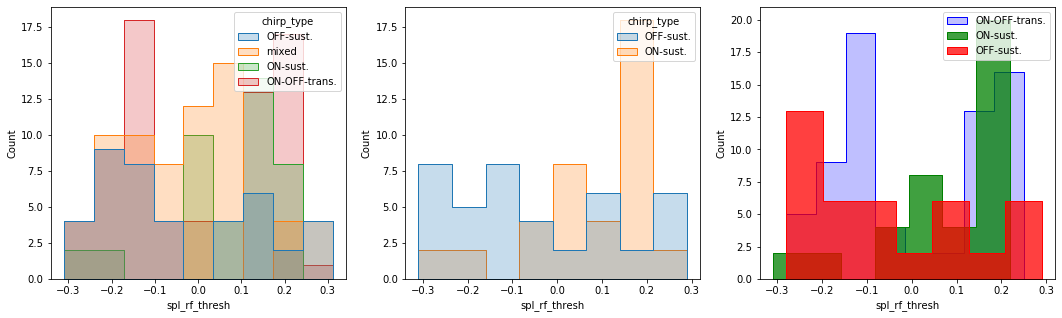

In [210]:
# Plot histograms of RF polarity vs chirp type
fig, axs = plt.subplots(1,3, figsize=(18,5))

sns.histplot(data=df, x='spl_rf_thresh', hue='chirp_type', element='step', ax=axs[0])#, bins=40)

sns.histplot(data=df[(df.chirp_type=='ON-sust.') | (df.chirp_type=='OFF-sust.')],
             x='spl_rf_thresh', hue='chirp_type', element='step', ax=axs[1])#, bins=40)

sns.histplot(data=df[df.chirp_type=='ON-OFF-trans.'], x='spl_rf_thresh', color='b', alpha=0.25, element='step', label='ON-OFF-trans.', ax=axs[2])#, bins=40)
sns.histplot(data=df[df.chirp_type=='ON-sust.'], x='spl_rf_thresh', color='g', element='step', label='ON-sust.', ax=axs[2])#, bins=40)
sns.histplot(data=df[df.chirp_type=='OFF-sust.'], x='spl_rf_thresh', color='r', element='step', label='OFF-sust.', ax=axs[2])#, bins=40)
# sns.histplot(data=df[df.chirp_type=='mixed'], x='spl_rf_thresh', color='y', element='step', label='mixed', ax=axs[2])#, bins=40)
plt.legend();

No handles with labels found to put in legend.


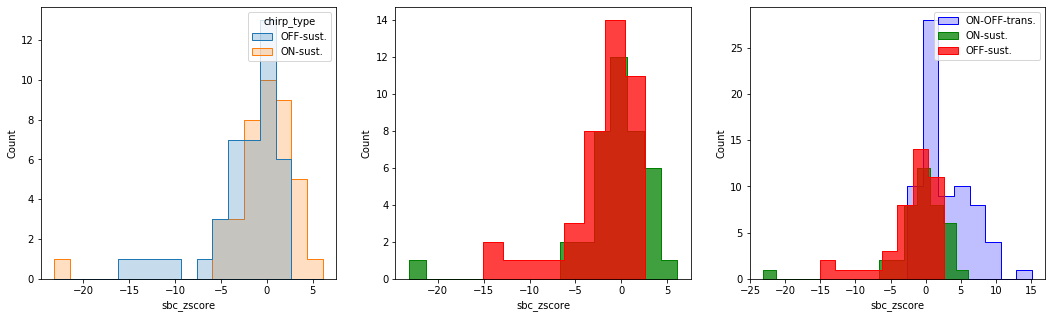

In [211]:
# Plot histograms of SbC zscore vs chirp type
fig, axs = plt.subplots(1,3, figsize=(18,5))

sns.histplot(data=df[(df.chirp_type=='ON-sust.') | (df.chirp_type=='OFF-sust.')],
             x='sbc_zscore', hue='chirp_type', element='step', ax=axs[0])#, bins=40)

sns.histplot(data=df[df.chirp_type=='ON-sust.'], x='sbc_zscore', color='g', element='step', label='ON-sust.', ax=axs[1])#, bins=40)
sns.histplot(data=df[df.chirp_type=='OFF-sust.'], x='sbc_zscore', color='r', element='step', label='OFF-sust.', ax=axs[1])#, bins=40)
plt.legend()

sns.histplot(data=df[df.chirp_type=='ON-OFF-trans.'], x='sbc_zscore', color='b', alpha=0.25, element='step', label='ON-OFF-trans.', ax=axs[2])#, bins=40)
sns.histplot(data=df[df.chirp_type=='ON-sust.'], x='sbc_zscore', color='g', element='step', label='ON-sust.', ax=axs[2])#, bins=40)
sns.histplot(data=df[df.chirp_type=='OFF-sust.'], x='sbc_zscore', color='r', element='step', label='OFF-sust.', ax=axs[2])#, bins=40)
# sns.histplot(data=df[df.chirp_type=='mixed'], x='spl_rf_thresh', color='y', element='step', label='mixed', ax=axs[1])#, bins=40)
plt.legend()